In [1]:
import os
import csv
import sys

root_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
sys.path.insert(0, root_path)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
rel_cats = {}
rel_types = {}

with open('../data/pretraining.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader, None)
    for row in csv_reader:
        rel_cat = row[1]
        rel_type = row[2]
        
        if rel_cat in ['event', 'physical', 'social']:
            if rel_cat in rel_cats:
                rel_cats[rel_cat] += 1
            else:
                rel_cats[rel_cat] = 1
            
            if rel_type in rel_types:
                rel_types[rel_type] += 1
            else:
                rel_types[rel_type] = 1

rel_cats = {k: v for k, v in sorted(rel_cats.items(), key=lambda item: item[1])}
rel_types = {k: v for k, v in sorted(rel_types.items(), key=lambda item: item[1])}

In [4]:
rel_cats

{'event': 145736, 'physical': 177706, 'social': 609197}

In [5]:
rel_types

{'xReason': 292,
 'Causes': 329,
 'Desires': 2712,
 'NotDesires': 2804,
 'MadeUpOf': 2908,
 'HasProperty': 4963,
 'CapableOf': 7212,
 'HasSubEvent': 10892,
 'isAfter': 16397,
 'isBefore': 17026,
 'AtLocation': 17407,
 'isFilledBy': 24055,
 'oReact': 27215,
 'oEffect': 30910,
 'oWant': 46574,
 'xIntent': 49366,
 'xReact': 61913,
 'HinderedBy': 76745,
 'xEffect': 81981,
 'xNeed': 90543,
 'xWant': 108368,
 'xAttr': 112327,
 'ObjectUse': 139700}

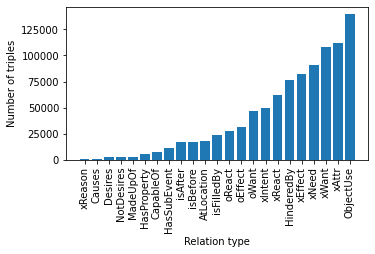

In [3]:
names = list(rel_types.keys())
values = list(rel_types.values())
plt.bar(range(len(rel_types)), values, tick_label=names)
plt.xlabel('Relation type')
plt.ylabel('Number of triples')
plt.gcf().subplots_adjust(bottom=0.35, left=0.2)
plt.xticks(rotation=90)
plt.savefig('relations.pdf', format="pdf", pad_inches=2)
plt.show()